# Figure 9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

from constants import *
from reader import KuiperBeltData

In [2]:
r10 = np.load("R_10_bi_rhopsmax_3_2_tmax_1000000_m_truncated_CO.npz")
r15 = np.load("R_15_bi_rhopsmax_3_5_tmax_1840000_m_truncated_CO.npz")
r20 = np.load("R_20_bi_rhopsmax_3_2_tmax_5721000_m_truncated_CO.npz")
r22 = np.load("R_22_bi_rhopsmax_3_2_tmax_8458000_m_truncated_CO.npz")
r25 = np.load("R_25_bi_rhopsmax_3_2_tmax_10000000_m_truncated_CO.npz")
r30 = np.load("R_30_bi_rhopsmax_3_2_tmax_10000000_m_truncated_CO.npz")

FileNotFoundError: [Errno 2] No such file or directory: 'R_10_bi_rhopsmax_3_2_tmax_1000000_m_truncated_CO.npz'

In [3]:
for key in r10.keys():
    print(key)

mass
density
ice_fraction
porosity


In [4]:
data  = [r10, r15, r20, r22, r25, r30]
radii = [10,   15,  20,  22,  25,  30]
times = [5.2532e5, 1.8399e6, 5.721e6, 8.458e6, 10e6, 10e6]
kbos = KuiperBeltData()

NameError: name 'data' is not defined

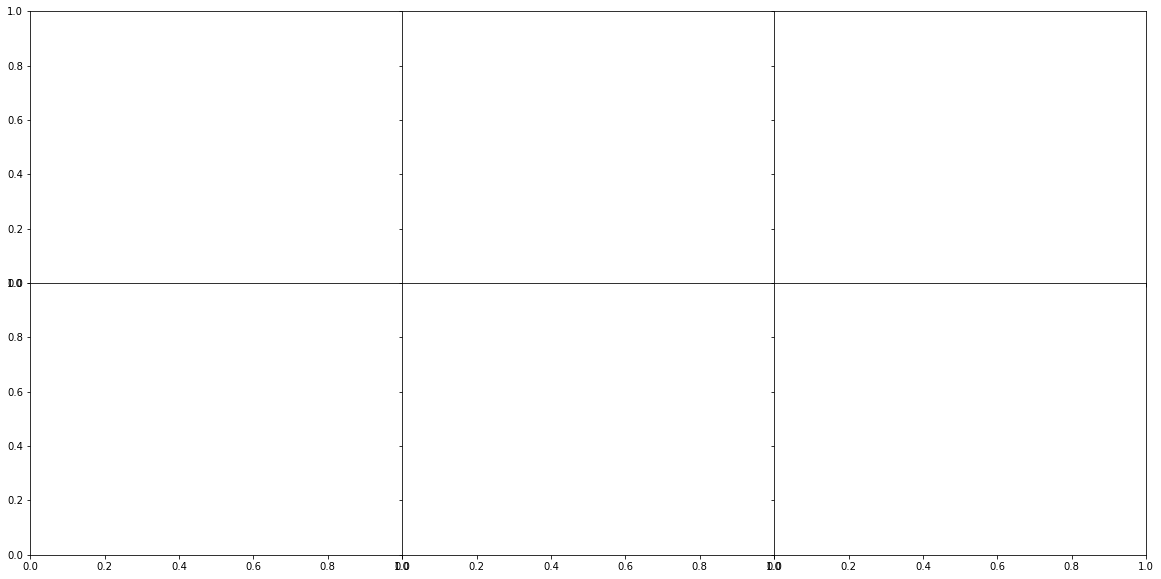

In [2]:
fig = plt.figure(figsize=(20, 10))
axes =fig.subplots(nrows=2, ncols=3, sharex='col', sharey='row')
plt.subplots_adjust(wspace=0, hspace=0)
cmap = plt.cm.seismic_r
norm = colors.BoundaryNorm(np.arange(0, 110, 10), cmap.N)

counter = 0
for row in range(len(axes)):
    for col in range(len(axes[0])):
        ax = axes[row][col]
        
        im = ax.scatter(data[counter]["mass"] / M_PLUTO, data[counter]["density"], c = data[counter]["ice_fraction"] * 100, cmap=cmap, norm=norm, zorder=2.5)
        ax.scatter(kbos.mass / M_PLUTO, kbos.density, c="darkgreen", marker="*", s=12 ** 2, zorder=2)
        ax.errorbar(x=kbos.mass / M_PLUTO, y=kbos.density, yerr=[kbos.min_density, kbos.max_density], ls='none', ecolor='darkgreen')
        ax.set_xscale('log')
        ax.set_xlim(2e-5, 3e1)
        ax.set_ylim(-0.25, 3.25)
        ax.text(5e-5, 2.95, f"R: {radii[counter]} AU                 ", fontsize=10, backgroundcolor="#FFF")
        ax.text(5e-5, 2.7, f"T: {times[counter]:.3e} Years", fontsize=10, backgroundcolor="#FFF")
        ax.grid()
        
        if row == 1:
            ax.set_xlabel(r"Mass (M$_{\rm{Pluto}}$)", fontsize=12)
            
        if col == 0:
            ax.set_ylabel(r"Density (g cm$^{-3}$)", fontsize=12)
        
        counter += 1
cbar_ax = fig.add_axes([0.815, 0.15, 0.01, 0.7])
fig.subplots_adjust(right=0.8)
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Ice Fraction (%)", fontsize=12, labelpad=20, rotation=270)
plt.savefig(fname="KBOs_v_r.pdf", format="pdf", dpi=350, bbox_inches='tight')

In [67]:
len(axes[0])

3